# Prepare

In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
df = pd.read_csv('automobile.csv')
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               201 non-null    object 
 3   fuel-type          201 non-null    object 
 4   aspiration         201 non-null    object 
 5   num-of-doors       199 non-null    object 
 6   body-style         201 non-null    object 
 7   drive-wheels       201 non-null    object 
 8   engine-location    201 non-null    object 
 9   wheel-base         201 non-null    float64
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb-weight        201 non-null    int64  
 14  engine-type        201 non-null    object 
 15  num-of-cylinders   201 non-null    object 
 16  engine-size        201 non

In [19]:
df.dropna(inplace=True)
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [20]:
'''
1. import and prepare data
2. find correlations 
3. build and fit model
4. evaluate model
'''

'\n1. import and prepare data\n2. find correlations \n3. build and fit model\n4. evaluate model\n'

C:\Users\Admin\AppData\Local\Temp\ipykernel_20456\3186793780.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<AxesSubplot: >

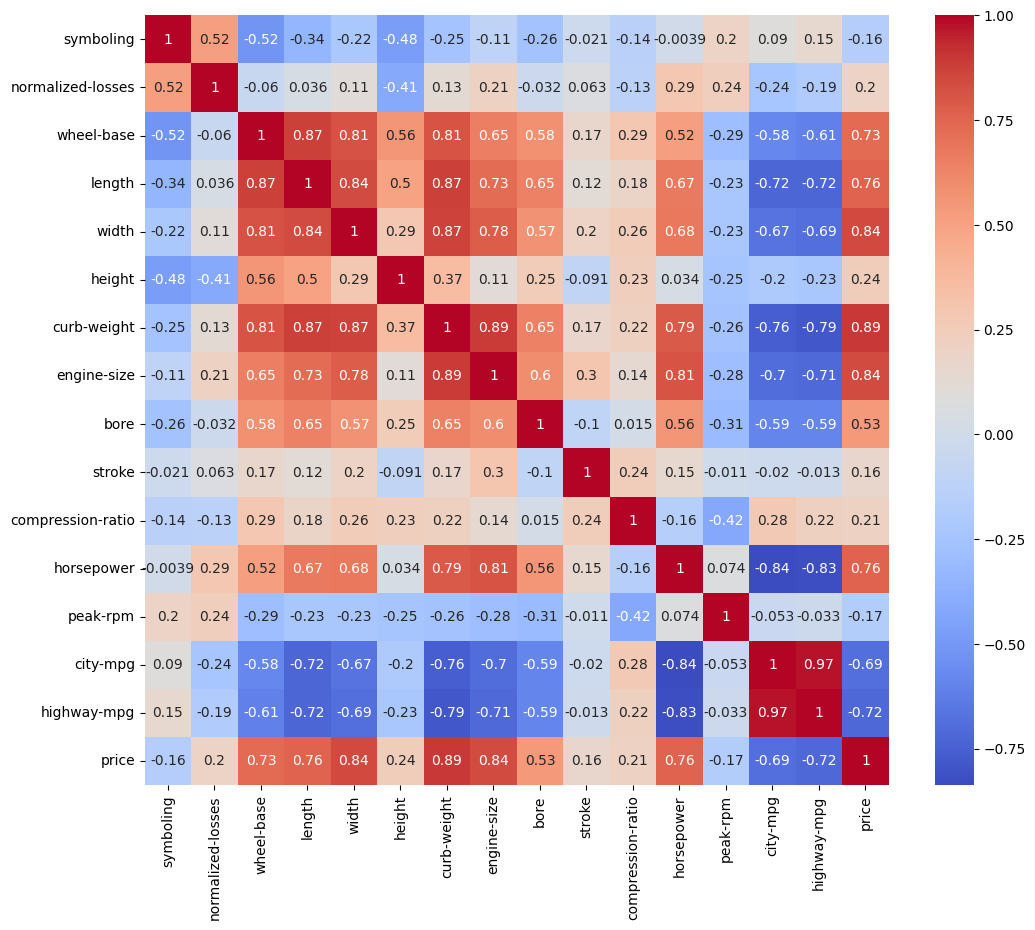

In [21]:
corr = df.corr()

fig, ax = plt.subplots(figsize=(12,10))

sns.heatmap(corr, cmap='coolwarm',annot=True,ax=ax)

# Linear Regression

In [22]:
# Linear regression
from sklearn.linear_model import LinearRegression
lrm = LinearRegression()

# Khai bao x va y trong ptrinh y=ax+b
x = df[['curb-weight']]
y = df['price']

# Fitting model
lrm.fit(x,y)

# Show predictions of y
y_predict = lrm.predict(x)
y_predict[0:10]

array([10092.74464866, 15400.56107487, 15618.54121557, 18256.10091812,
       10724.88705671, 10724.88705671, 14158.07427284, 14757.51965978,
         839.48767566,  5046.5043913 ])

In [23]:
# Vậy a và b là bao nhiêu trong phương trình này?
print(f'a (coefficient)= {lrm.coef_}')
print(f'b (interception)= {lrm.intercept_}')

# Bởi vì linear regression chỉ sử dụng một biến x nên chỉ có 1 coeficient

a (coefficient)= [10.89900704]
b (interception)= -15378.234792920191


# Multiple Linear Regression

In [26]:
#from sklearn.linear_model import LinearRegression
#lrm = LinearRegression()

x_m = df[['curb-weight', 'horsepower']]
y_m = df['price']

lrm.fit(x_m,y_m)

y_m_predict = lrm.predict(x_m)
y_m_predict[0:10]

array([10432.96897927, 15424.94447197, 15478.30335646, 18604.00628409,
       10957.66350939, 10957.66350939, 14504.20922187, 15027.75091497,
         871.57396541,  5148.77237417])

In [28]:
# Let see a and b of this mlr model
print(f'a (coefficient)= {lrm.coef_}')
print(f'b (interception)= {lrm.intercept_}')

# So beacuse this is multiple lr, it use 2 varible x1 and x2 -> they have 2 a (a1 and a2)

a (coefficient)= [ 9.51893987 27.4039826 ]
b (interception)= -14607.999732681155


# Evaluation